<h1 align= "center">📊Modelagem com Pandas e Matplotlib.</h1>

<h3 align= "center" >Tratando os dados e verificando o faturamento das Lojas.</h3>

In [171]:
#importando pacotes
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#lendo arquivos
df = pd.read_excel("Fonte_venda_ficticio.xlsx")
#mostrando apenas as 2 primeiras linhas
display(df.head(2))
#mostrando a qtd de linhas e colunas
display(df.shape)


,Empresa,Cliente,Cidade Destino,UF Destino,Peso,Valor,Volume,Estado
0,LOJA08,CLIENTE16,Brasilia,DF,0.0,229.00,2,DF
1,LOJA08,CLIENTE16,Brasilia,DF,0.0,783.82,2,DF


(1786, 8)

In [172]:
#Removendo colunas
df = df.drop("Estado", axis=1)

#renomendo colunas
df.rename(columns={'Empresa':'Lojas','Valor':'Valor_Total'}, inplace = True)
#descrição brevia
df.describe()

,Peso,Valor_Total,Volume
count,1786.000000,1.786000e+03,1786.000000
mean,242.975264,8.272381e+03,4.325868
std,4648.162114,6.481348e+04,13.454068
min,0.000000,0.000000e+00,0.000000
25%,0.000000,6.520000e+02,1.000000
50%,1.000000,1.800000e+03,1.000000
75%,6.575000,4.883460e+03,3.000000
max,156390.000000,2.093558e+06,300.000000


In [173]:
#Verificando dados distintos
display(df['Cidade Destino'].unique())

array(['Brasilia', 'GOIANIA', 'FEIRA DE SANTANA', 'TRINDADE', 'SAO PAULO',
       'CATALAO', 'RIO VERDE', 'PIRENOPOLIS', 'FORTALEZA', 'SOBRAL',
       'MACEIO', 'LAURO DE FREITAS', 'ATIBAIA', 'EUSEBIO', 'AMERICANA',
       'VITORIA', 'MANAUS', 'CAMPOS DO JORDAO', 'FLORIANOPOLIS',
       'RIO BRANCO', 'BARREIRAS', 'FORMOSA', 'ALAGOINHAS',
       'GOVERNADOR VALADARES', 'BIGUACU', 'CAMPINAS', 'BARRA DO CHOCA',
       'BEBEDOURO'], dtype=object)

In [174]:
#Alterando todos os dados da tabela
df =df.replace({'Brasilia':'BRASILIA','SAO PAULO':'SP'})
#Alteradno por coluna
#df['Cidade Destino'].replace('Brasilia','BRASILIA')

In [175]:
#Verificando tipos
df.dtypes

Lojas              object
Cliente            object
Cidade Destino     object
UF Destino         object
Peso              float64
Valor_Total       float64
Volume              int64
dtype: object

In [176]:
#Tabela; resumo das medidas peso, volume e valor.

resumo = df.groupby('Lojas').sum()
resumo = resumo[['Peso','Volume','Valor_Total']].sort_values(by="Lojas",ascending=True)
display(resumo)

,Peso,Volume,Valor_Total
Lojas,,,
LOJA01,0.000,1,3082.00
LOJA02,51.764,21,10413.56
LOJA03,44148.422,1156,1192359.20
LOJA04,1418.915,280,341352.15
LOJA05,24.680,226,191677.08
LOJA06,649.651,222,283754.18
LOJA07,1175.420,396,763321.89
LOJA08,192.000,896,3806915.87
LOJA09,108.000,37,4684650.30


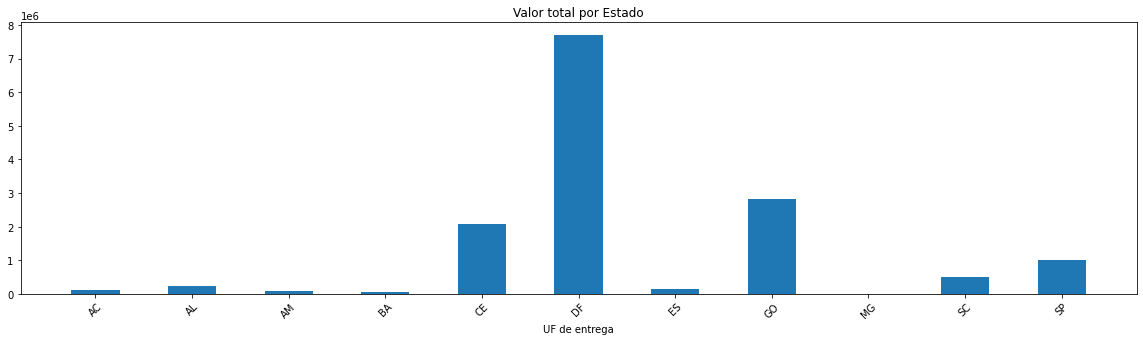

In [177]:
#ciando gráfico do valor total por estado
valor = df.groupby('UF Destino', as_index=True)["Valor_Total"].sum()
#configurando style e exibindo o gráfico
plt.figure(figsize =(20,5))
plt.bar(valor.index, valor.values, width=0.5)
plt.title('Valor total por Estado')
plt.xlabel('UF de entrega')
plt.xticks(rotation=45)
plt.show()


Lojas
LOJA01       3082.00
LOJA02      10413.56
LOJA03    1192359.20
LOJA04     341352.15
LOJA05     191677.08
LOJA06     283754.18
LOJA07     763321.89
LOJA08    3806915.87
LOJA09    4684650.30
LOJA10    2420897.19
LOJA11     853211.25
LOJA12     222837.12
Name: Valor_Total, dtype: float64

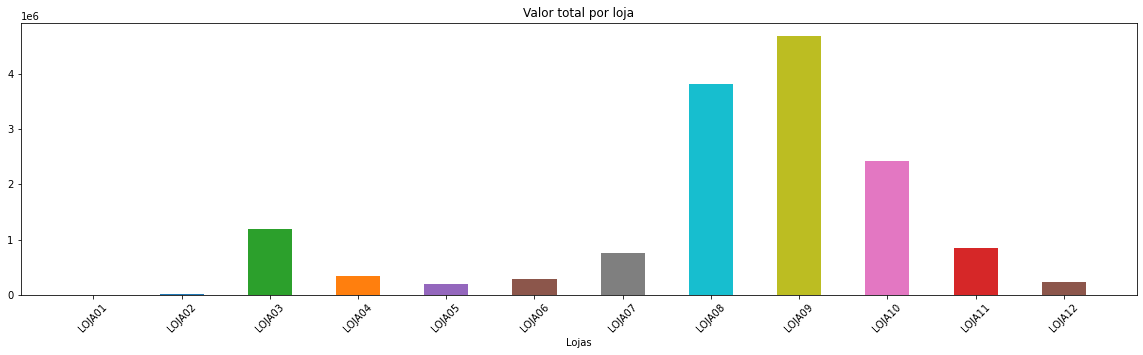

In [178]:
#Criando gráfico do valor total por loja
loja= df.groupby('Lojas', as_index=True)["Valor_Total"].sum()
#Definindo as cores
bar_color = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange','tab:purple', 'tab:brown', 'tab:gray', 'tab:cyan','tab:olive', 'tab:pink', 'tab:red','tab:brown']
#Verificando os valores
display(loja)
#Configuração do gráfico
plt.figure(figsize=(20,5))
plt.bar(loja.index, loja.values, width=0.5, color=bar_color)
plt.title('Valor total por loja')
plt.xlabel('Lojas')
plt.xticks(rotation=45)
plt.show()


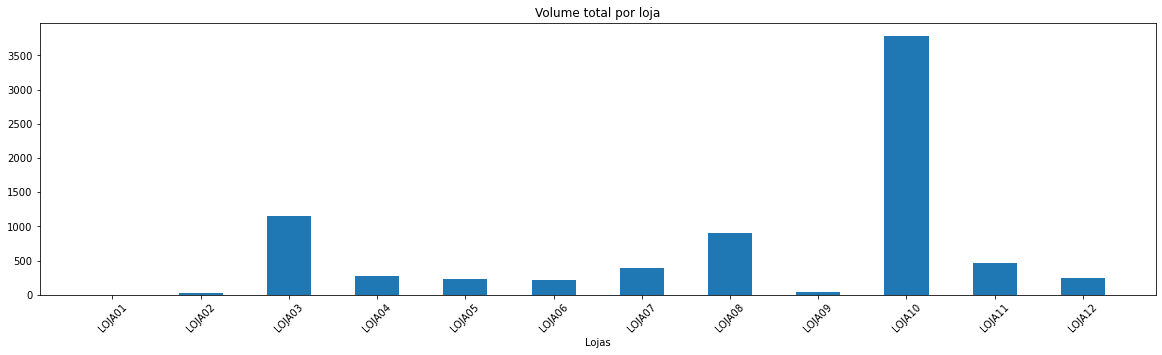

In [179]:
lojavolume= df.groupby('Lojas', as_index=True)["Volume"].sum()
plt.figure(figsize=(20,5))
plt.bar(lojavolume.index, lojavolume.values, width=0.5)
plt.title('Volume total por loja')
plt.xlabel('Lojas')
plt.xticks(rotation=45)
plt.show()

Total de clientes:
30
------------------------------------------------------------------------------------------------------------------------


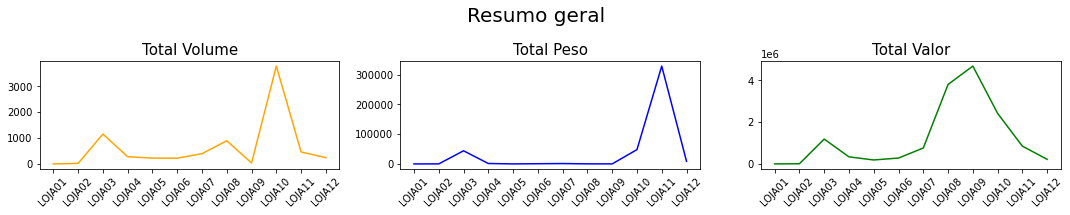

In [180]:
volume = df.groupby('Lojas').sum()
volume = volume[['Volume']].sort_values(by="Lojas",ascending=True)
peso = df.groupby('Lojas').sum()
peso = peso[['Peso']].sort_values(by="Lojas",ascending=True)
total = df.groupby('Lojas').sum()
total = total[['Valor_Total']].sort_values(by="Lojas",ascending=True)
cliente=df['Cliente'].unique()
plt.figure(figsize=(15, 3))
plt.suptitle('Resumo geral', fontsize= 20)
plt.subplot(131)
plt.title('Total Volume',fontsize= 15)
plt.plot(volume.index, volume.values,color= 'orange')
plt.xticks(rotation=45)
plt.subplot(132)
plt.title('Total Peso',fontsize= 15)
plt.plot(peso.index, peso.values, color= 'blue')
plt.xticks(rotation=45)
plt.subplot(133)
plt.title('Total Valor',fontsize= 15)
plt.plot(total.index, total.values,color= 'green')
plt.xticks(rotation=45)
print('Total de clientes:')
print(len(cliente))
print("---"*40)
plt.tight_layout()
plt.show()

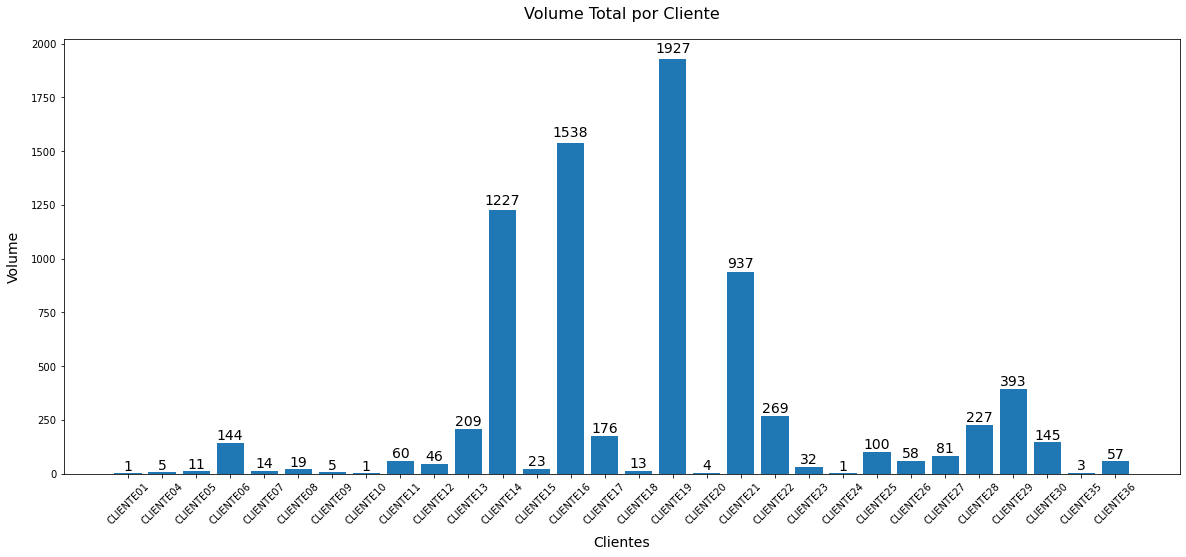

In [195]:
#Total de volume por cliente
#Agrupando dados
cliente = df.groupby('Cliente').sum()
cliente = cliente[['Volume']].sort_values(by="Cliente",ascending=True)

fig, ax = plt.subplots(figsize=(20, 8))
x = np.arange(len(cliente))

# Plotando o gráfico
grafico = ax.bar(x = x, height='Volume',  data=cliente) 
ax.set_title('Volume Total por Cliente', fontsize=16, pad=20)
ax.set_xlabel('Clientes', fontsize=14, labelpad=10)
ax.set_ylabel('Volume', fontsize=14, labelpad=10)
ax.set_xticks(x)
plt.xticks(rotation=45)
ax.set_xticklabels(cliente.index)

# colocando o rótulo nas barras
# Criando uma função para adicionar rótulos sobre as barras do gráfico
def rotulo(grafico):
     for barra in grafico:
            altura = barra.get_height()
            largura = barra.get_width()
            xpos = barra.get_x() + largura/2
            ypos = 1.01 * altura
            ax.text(x = xpos, y = ypos, s = altura, ha='center', va='bottom', fontsize=14)
rotulo(grafico)
plt.show()

<h5 align= "justify"> Fim </h5>